Usando los datos historicos de Doordash responda cada una de las siguientes pregunta,
argumente donde considere que aplique:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pprint

data = pd.read_csv('./data/doordash.csv' )

Pregunta 1: ¿Cual es el ‘store id‘ con la mayor cantidad de dinero en ventas?

In [6]:
sum_by_store = data.groupby('store_id')['subtotal'].sum()
print('ID: ',sum_by_store.idxmax(), '\nSUM: ', sum_by_store.max())

ID:  6074 
SUM:  2636241


Pregunta 2: ¿Cuantas tiendas diferentes venden pizza?

In [7]:
pprint.pprint(list(data['store_primary_category'].unique()))

['american',
 'mexican',
 nan,
 'indian',
 'italian',
 'sandwich',
 'thai',
 'cafe',
 'salad',
 'pizza',
 'chinese',
 'singaporean',
 'burger',
 'breakfast',
 'mediterranean',
 'japanese',
 'greek',
 'catering',
 'filipino',
 'convenience-store',
 'other',
 'korean',
 'vegan',
 'asian',
 'barbecue',
 'fast',
 'dessert',
 'smoothie',
 'seafood',
 'vietnamese',
 'cajun',
 'steak',
 'middle-eastern',
 'soup',
 'vegetarian',
 'persian',
 'nepalese',
 'sushi',
 'latin-american',
 'hawaiian',
 'chocolate',
 'burmese',
 'british',
 'pasta',
 'alcohol',
 'dim-sum',
 'peruvian',
 'turkish',
 'malaysian',
 'ethiopian',
 'afghan',
 'bubble-tea',
 'german',
 'french',
 'caribbean',
 'gluten-free',
 'comfort-food',
 'gastropub',
 'pakistani',
 'moroccan',
 'spanish',
 'southern',
 'tapas',
 'russian',
 'brazilian',
 'european',
 'cheese',
 'african',
 'argentine',
 'kosher',
 'irish',
 'lebanese',
 'belgian',
 'indonesian',
 'alcohol-plus-food']


In [8]:
pizza_placements = data[data['store_primary_category'] == 'pizza']['store_id'].nunique()
print(pizza_placements)

1088


Ahora, las tiendas que podrian vender pizza tambien son las de tipo 'italian'. 

In [9]:
italian_placements = data[data['store_primary_category'] == 'italian']['store_id'].nunique()
print(italian_placements)

612


Pregunta 3: ¿Puede afirmarse que mas elementos distintos en la compra esta
asociado con la variable estimated store to consumer driving duration?

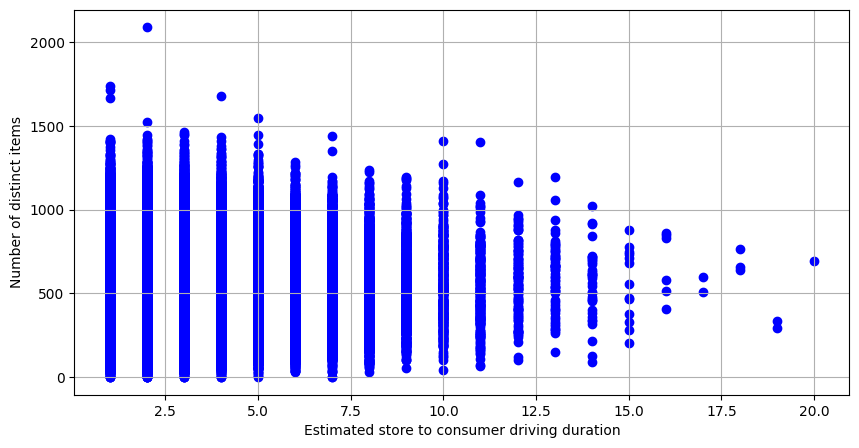

In [10]:
plt.figure(figsize=(10, 5)) 
plt.scatter(data['num_distinct_items'],data['estimated_store_to_consumer_driving_duration'], marker='o', linestyle='-', color='b')  # Line graph with blue line and circle markers

plt.title('')
plt.xlabel('Estimated store to consumer driving duration')
plt.ylabel('Number of distinct items')

plt.grid(True)

plt.show()

Pregunta 4: ¿Que tipo de comida tarda menos en ser preparada (desde creacion
de orden hasta delivery)?

chocolate 2048.0 secs


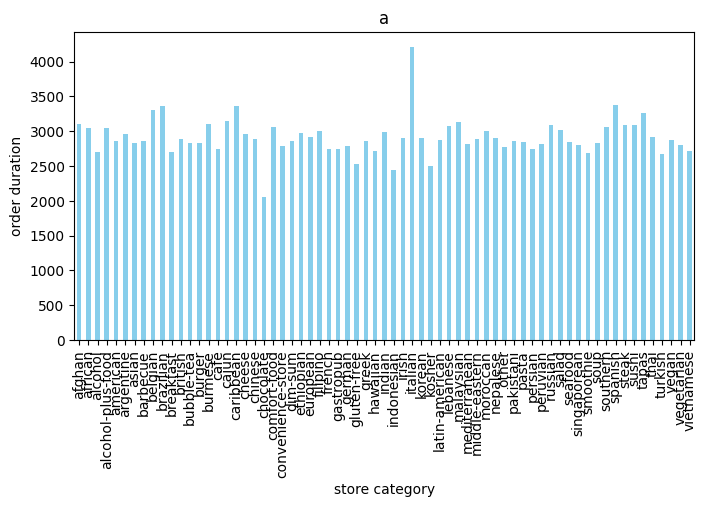

In [13]:
cpy = data.copy()

cpy['created_at'] = pd.to_datetime(data['created_at']).astype('int64') // 10**9
cpy['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time']).astype('int64') // 10**9
data['order_duration'] = cpy['actual_delivery_time'] - cpy['created_at']

category_avg = data.groupby('store_primary_category')['order_duration'].mean()
indices_to_drop = category_avg[category_avg < 0].index
category_avg.drop(indices_to_drop, inplace=True)

print(category_avg.idxmin(),category_avg.min(), 'secs')

plt.figure(figsize=(8, 4))  
category_avg.plot(kind='bar', color='skyblue')  # Create a bar chart with sky blue color

plt.title('a')
plt.xlabel('store category')
plt.ylabel('order duration')

plt.show()

Pregunta 5: Usando la ubicacion con menos ordenes, ¿Cual es el mejor momento para ordenar entre [5pm, 10pm]? Responda que ubicacion uso y la mejor hora para ordenar

In [171]:
orders_by_market = data.groupby('market_id').size()
print('LOCATION: ',orders_by_market.idxmin(), '\nAMOUNT OF ORDERS: ', orders_by_market.min())

LOCATION:  6.0 
AMOUNT OF ORDERS:  14450


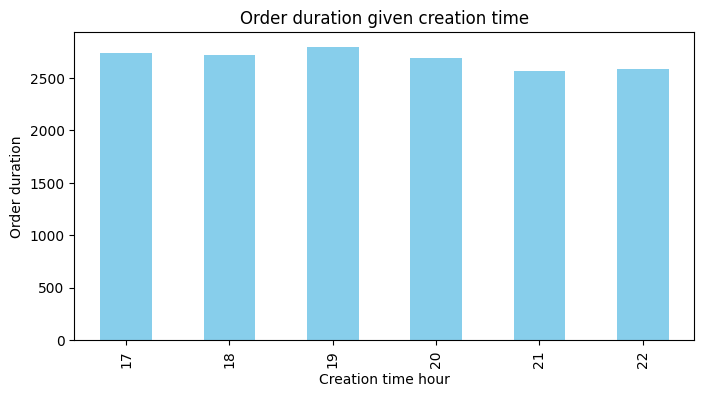

In [172]:
data_min_store = data[data['market_id'] == 6].copy()

data_min_store['created_at'] = pd.to_datetime(data['created_at'])
data_min_store['creation_hour'] = data_min_store['created_at'].dt.hour

data_min_store = data_min_store[(data_min_store['creation_hour'] >= 17) & (data_min_store['creation_hour'] <= 22)]

category_avg = data_min_store.groupby('creation_hour')['order_duration'].mean()

plt.figure(figsize=(8, 4))  
category_avg.plot(kind='bar', color='skyblue')  

plt.title('Order duration given creation time')
plt.xlabel('Creation time hour')
plt.ylabel('Order duration')

plt.show()